# Assignment 5

Authored by Maksim Nikiforov

## Part I - Concepts

1. Sampling distributions are the pattern and the frequency with which we observe some sample statistic (e.g. mean, median, mode, variance, standard deviation, etc.) over the long run (i.e. repeated samplings). Sampling distributions help us make inference about a population using observations from samples.  

2a. Investigate the sampling distribution of $S^2$ for a sample size of $n = 10$.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
# Generate samples from a standard normal distribution
# The location (loc) keyword specifies the mean, the scale (scale) keyword specifies the standard deviation
norm_sample = stats.norm.rvs(loc=0, scale=1, size=10)

# Compute the variance using numpy
np.var(norm_sample, ddof=1)

In [14]:
# Confirm numpy-based variance manually
samp_variance = sum((norm_sample - np.mean(norm_sample))**2)/(len(norm_sample) - 1)
samp_variance

1.062971418880097

In [19]:
# Initialize empty list of variances
variance_array = []

# Repeat 10,000 times
for i in range(0, 10000):
    # Generate a sample size of 10 from a standard normal distribution
    # The location (loc) keyword specifies the mean, the scale (scale) keyword specifies the standard deviation
    norm_sample = stats.norm.rvs(loc=0, scale=1, size=10)
    # Compute the variance using numpy
    sample_variance = np.var(norm_sample, ddof=1)
    # Append variance to array
    variance_array.append(sample_variance)

len(variance_array)

10000

Text(0.5, 1.0, 'Sampling Distribution of Sample Variances for Sample Size n=10, loc=0, scale=1')

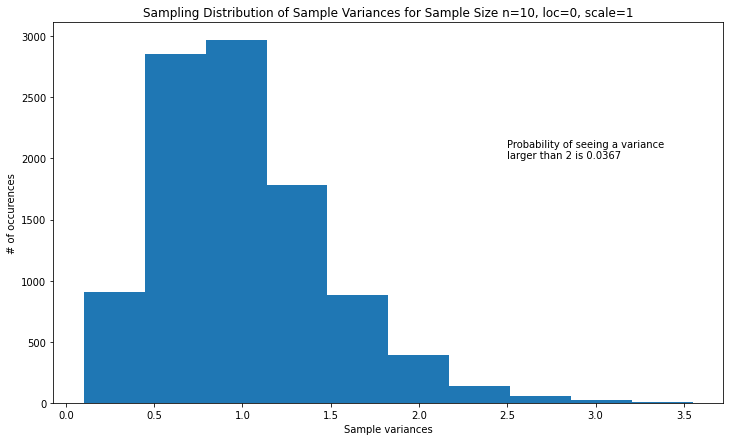

In [28]:
plt.figure(figsize=(12,7))
plt.hist(variance_array)
plt.text(
    x=2.5,
    y=2000,
    s = "Probability of seeing a variance \nlarger than 2 is " + str(round(np.mean(np.array(variance_array)>2), 4))
)
plt.xlabel("Sample variances")
plt.ylabel("# of occurences")
plt.title("Sampling Distribution of Sample Variances for Sample Size n=10, loc=0, scale=1")

2b. Repeat the above process (and histogram/probability calculation) with a sample size of 30.

In [29]:
# Initialize empty list of variances
variance_array = []

# Repeat 10,000 times
for i in range(0, 10000):
    # Generate a sample size of 30 from a standard normal distribution
    # The location (loc) keyword specifies the mean, the scale (scale) keyword specifies the standard deviation
    norm_sample = stats.norm.rvs(loc=0, scale=1, size=30)
    # Compute the variance using numpy
    sample_variance = np.var(norm_sample, ddof=1)
    # Append variance to array
    variance_array.append(sample_variance)

Text(0.5, 1.0, 'Sampling Distribution of Sample Variances for Sample Size n=30, loc=0, scale=1')

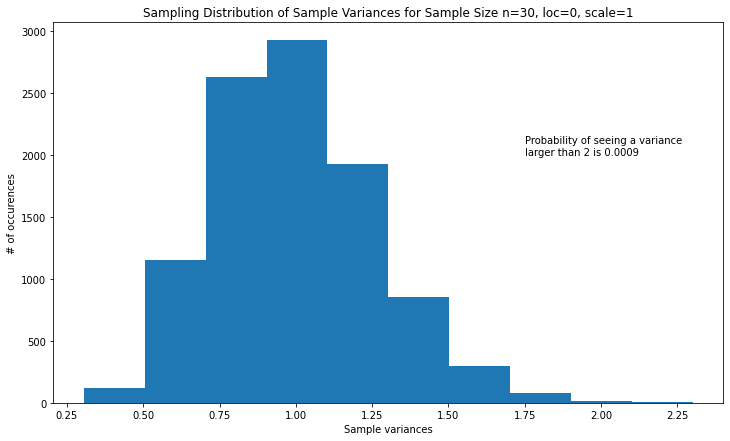

In [32]:
plt.figure(figsize=(12,7))
plt.hist(variance_array)
plt.text(
    x=1.75,
    y=2000,
    s = "Probability of seeing a variance \nlarger than 2 is " + str(round(np.mean(np.array(variance_array)>2), 4))
)
plt.xlabel("Sample variances")
plt.ylabel("# of occurences")
plt.title("Sampling Distribution of Sample Variances for Sample Size n=30, loc=0, scale=1")

3. 

4. The "RDBMS" acronym stands for "relational database management system(s)". Relational databases contain 2-dimensional tables that are linked by keys, and relational database management systems such as Azure SQL, MySQL, SQL Server, etc. are systems that hold those databases, provide APIs for manipulating those databases, and provide security controls for accessing the databases.

## Part II - Querying a database

In [40]:
# Connect to the lahman.db database
import sqlite3

con = sqlite3.connect("lahman2016.db")

In [41]:
# Look at all of the tables in the database.
# Use read_sql() from pandas to have this returned as a data frame.
import pandas as pd

pd.read_sql("SELECT name FROM sqlite_schema WHERE type = 'table'", con)

,name
0,AllstarFull
1,Appearances
2,AwardsManagers
3,AwardsPlayers
4,AwardsShareManagers
5,AwardsSharePlayers
6,Batting
7,BattingPost
8,CollegePlaying
9,Fielding


In [44]:
# Write an SQL query that returns all the teams that played in the year 2015 
# with all of the corresponding columns from the Teams table. 
# # Turn the result into a data frame by using pandas.
pd.read_sql("SELECT * FROM Teams WHERE YearID = 2015", con)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2015,AL,BAL,BAL,E,3,162,78,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202,103,104,BAL,BAL,BAL
1,2015,AL,BOS,BOS,E,5,162,81,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694,104,107,BOS,BOS,BOS
2,2015,AL,CHA,CHW,C,4,162,81,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810,92,93,CHW,CHA,CHA
3,2015,AL,CLE,CLE,C,3,161,80,81,80,...,136,0.987,Cleveland Indians,Progressive Field,1388905,106,106,CLE,CLE,CLE
4,2015,AL,DET,DET,C,5,161,81,74,87,...,165,0.986,Detroit Tigers,Comerica Park,2726048,97,98,DET,DET,DET
5,2015,AL,HOU,HOU,W,2,162,81,86,76,...,131,0.986,Houston Astros,Minute Maid Park,2153585,97,99,HOU,HOU,HOU
6,2015,AL,KCA,KCR,C,1,162,81,95,67,...,138,0.985,Kansas City Royals,Kauffman Stadium,2708549,104,103,KCR,KCA,KCA
7,2015,AL,LAA,ANA,W,3,162,81,85,77,...,108,0.984,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,3012765,94,95,LAA,ANA,ANA
8,2015,AL,MIN,MIN,C,2,162,81,83,79,...,150,0.986,Minnesota Twins,Target Field,2220054,103,104,MIN,MIN,MIN
9,2015,AL,NYA,NYY,E,2,162,81,87,75,...,135,0.985,New York Yankees,Yankee Stadium III,3193795,99,101,NYY,NYA,NYA


In [ ]:
# Write an SQL query that returns all of the players in the hall of fame, 
# the year they were voted into the hall of fame, and their category - see the HallOfFame table, the inducted variable is important here. 
# Turn the result into a data frame (either by using pandas or by using sqlite3 and then converting it to a data frame).